In [1]:
#import the library
import pandas as pd

In [2]:
#read the training dataset
df=pd.read_csv('E:\Desktop\Datasets\Data Analysis\Titanic_Train.csv')

## Data preparation

In [3]:
#head values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#summary statistics of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#datatypes of the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#shape of the dataframe
df.shape

(891, 12)

In [8]:
#check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#check for duplicated rows(sum)
df.duplicated().sum()

0

## correlation

In [10]:
#correlation matrix
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
import numpy as np

In [12]:
copy=np.zeros_like(df.corr())
copy

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [13]:
upper_tri=np.triu_indices_from(copy) #get the upper triangle values of copy array

In [14]:
copy[upper_tri]=True
copy

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

## Vizualizations

In [15]:
#import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Age'>

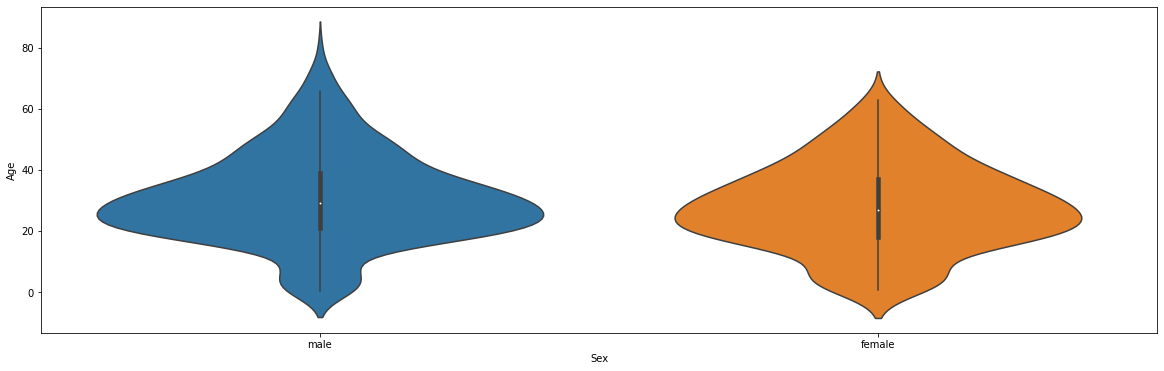

In [16]:
#violinplot 
plt.figure(figsize=(20,6))
sns.violinplot(x='Sex',y='Age',data=df)

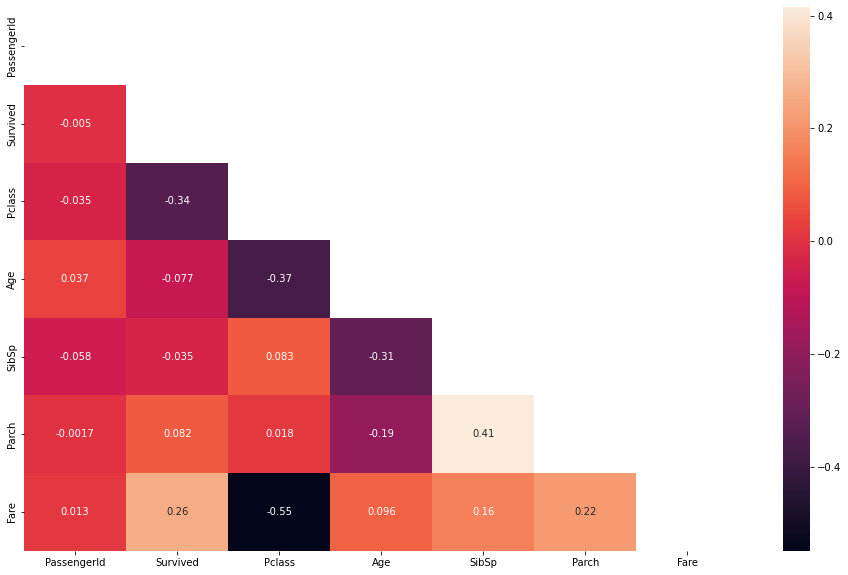

In [17]:
#Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=copy,annot=True) #mask->copy(only show the False values location of df.corr() output)
plt.show()

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

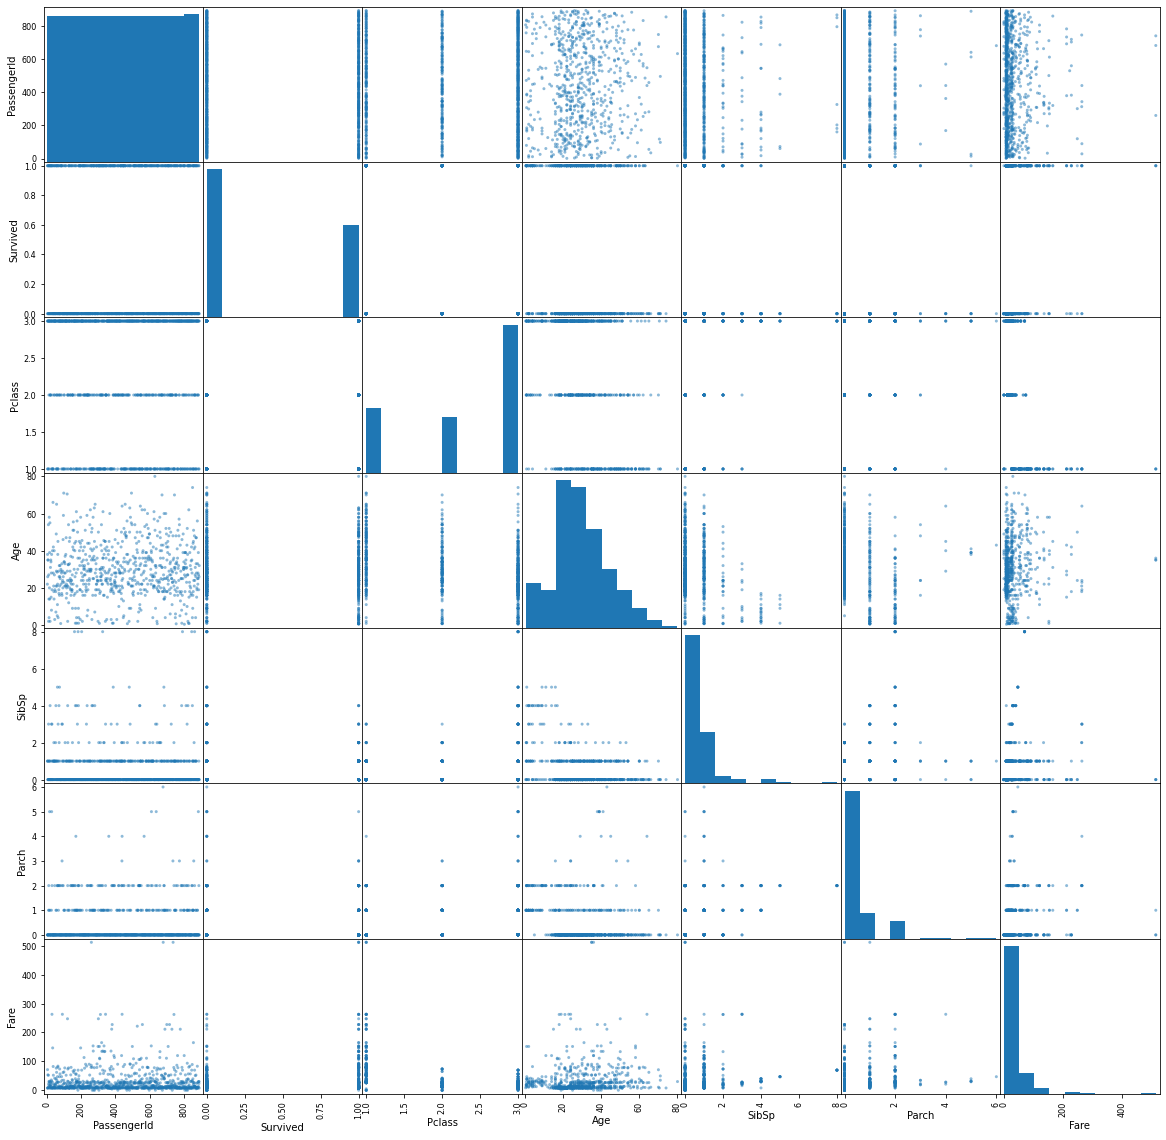

In [18]:
#correlation matrix as plot
pd.plotting.scatter_matrix(df.loc[:,['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']],figsize=(20,20))

In [19]:
#columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
#check for class imbalance
df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
#change the sex variable 2 values to numeric
df.Sex[df.Sex == 'male'] = 0
df.Sex[df.Sex == 'female'] = 1

C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/1015508617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'male'] = 0
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/1015508617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'female'] = 1


In [24]:
#change the Embarked variable 3 values to numeric
df.Embarked[df.Embarked == 'C'] = 1
df.Embarked[df.Embarked == 'Q'] = 2
df.Embarked[df.Embarked == 'S'] = 3

C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/3195029578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == 'C'] = 1
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/3195029578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == 'Q'] = 2
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/3195029578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == 'S']

In [25]:
#df['Embarked'].fillna(df['Embarked'].mean())
df = df[df['Embarked'].notna()]

In [26]:
#Feature Scaling/// Let;s see this also later....(after evaluation)

In [27]:
#import the library
from sklearn.preprocessing import StandardScaler

In [28]:
x_train=df.drop(['Survived','Name','Ticket','Cabin','Age'],axis=1) #I think Cabin detail is required,let's see later.(after evaluation)
y_train=df['Survived']

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [30]:
#read the dataset
df1=pd.read_csv('E:\Desktop\Datasets\Data Analysis\Titanic_Test.csv')

In [31]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
#change the sex variable 2 values to numeric
df1.Sex[df1.Sex == 'male'] = 0
df1.Sex[df1.Sex == 'female'] = 1

C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/4133835645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Sex[df1.Sex == 'male'] = 0
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/4133835645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Sex[df1.Sex == 'female'] = 1


In [34]:
#change the Embarked variable 3 values to numeric
df1.Embarked[df1.Embarked == 'C'] = 1
df1.Embarked[df1.Embarked == 'Q'] = 2
df1.Embarked[df1.Embarked == 'S'] = 3

C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/2975933598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Embarked == 'C'] = 1
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/2975933598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Embarked == 'Q'] = 2
C:\Users\RAVI\AppData\Local\Temp/ipykernel_21120/2975933598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Embarked[df1.Embarked =

In [35]:
#fill with mean
mean_value=df1['Fare'].mean()
df1['Fare'].fillna(value=mean_value, inplace=True)

In [36]:
x_test=df1.drop(['Name','Ticket','Cabin','Age'],axis=1) #I think Cabin detail is required,let's see later.(after evaluation)

In [37]:
#cross validation on the model(to check on the traing data(evaluation))
from sklearn.model_selection import cross_val_score

In [38]:
#import the libraries (for models)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### RandomForestClassifier

In [93]:
rf=RandomForestClassifier(n_estimators=400, max_depth=3, random_state=7,max_features='auto')
#rf=RandomForestClassifier(n_estimators=10, max_features='auto',max_depth=3,random_state=7)
cv=cross_val_score(rf,x_train,y_train)
print(cv)
print(cv.mean())

[0.74719101 0.82022472 0.83146067 0.78651685 0.8079096 ]
0.7986605725893481


### KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,x_train,y_train)
print(cv)
print(cv.mean())

[0.62359551 0.4494382  0.47191011 0.5        0.68361582]
0.5457119278867518


### LogisticRegression

In [41]:
lr=LogisticRegression()
cv=cross_val_score(lr,x_train,y_train)
print(cv)
print(cv.mean())

[0.7752809  0.80337079 0.7752809  0.76404494 0.8079096 ]
0.7851774265219322


C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

### SVC

In [42]:
svc=SVC()
cv=cross_val_score(svc,x_train,y_train)
print(cv)
print(cv.mean())

[0.61797753 0.63483146 0.65168539 0.64044944 0.65536723]
0.6400622103726274


### DecisionTreeClassifier 

In [43]:
dt = DecisionTreeClassifier(max_depth=1)
cv=cross_val_score(dt,x_train,y_train)
print(cv)
print(cv.mean())

[0.80337079 0.80337079 0.78651685 0.75280899 0.78531073]
0.7862756300387227


In [44]:
#lr.fit(x_train,y_train)
#predictions = rf.predict(x_test)
#output = pd.DataFrame({'PassengerId': df1.PassengerId,'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print('Done')

In [83]:
#rf.fit(x_train,y_train)
#predictions = rf.predict(x_test)
#output = pd.DataFrame({'PassengerId': df1.PassengerId,'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print('Done')

Done
